In [1]:

%matplotlib inline
import numpy as np
from qiskit import QuantumCircuit, transpile, QuantumRegister, ClassicalRegister
from qiskit.circuit.library import QFT
from qiskit_aer import AerSimulator
import matplotlib.pyplot as plt
from qiskit.visualization import plot_histogram
from qiskit.result import marginal_counts

In [47]:
N = 5
angle = 0.25
# N is the number of subcircuits
# Each circuit has 1+1 qubits
mbits = []

qc = QuantumCircuit(2*N,N)

for i in range(N):
    start = 2*i
    qc.h(start)
    qc.x(start+1)
    qc.crz(0.1*2**(N-i),start,start+1)
    
    for j in range(i-1,-1,-1):
        qc.rz(2**(-j-1),start).c_if(i-j,1)
    
    qc.h(start)
    qc.measure(start,i)
    qc.barrier()
    

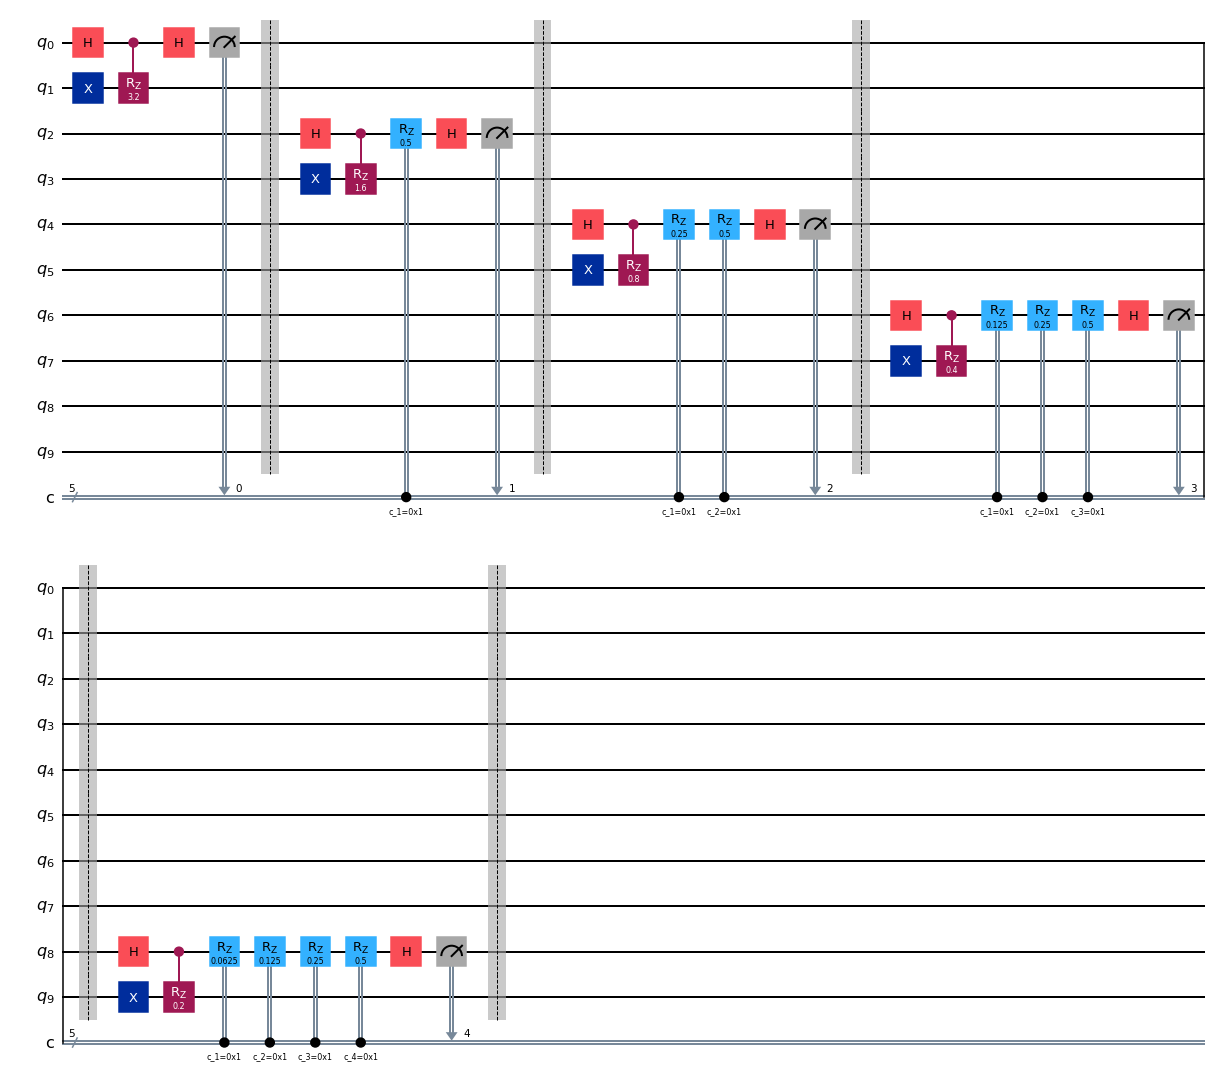

In [48]:
qc.draw('mpl')

In [49]:
def classical_reverse(counts):
    reversed_counts = {}
    for k,v in counts.items():
        reversed_counts[k[::-1]]=v
    return reversed_counts

In [50]:
backend = AerSimulator()
counts = backend.run(qc, shots = 1000).result().get_counts()

counts_r = classical_reverse(counts)



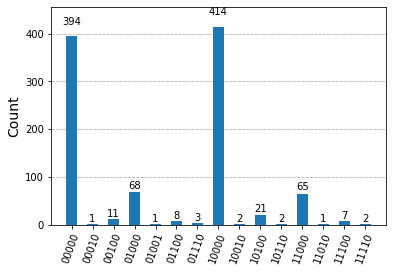

In [51]:
plot_histogram(counts_r)

In [ ]:
[(theta_val/(2*np.pi)),0]